In [33]:
#Lets look at some sentiment data


#imports
import pandas as pd
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

style.use('fivethirtyeight')


#We are going to be trying different classifiers to see what works best
types = [MultinomialNB, SGDClassifier, BaggingClassifier, KNeighborsClassifier, RandomForestClassifier]
lbls = ['MNB', 'SGDC', 'BC', 'KNC', 'RFC']


#load data
results = [];
pos = pd.read_table('pos.txt', header = None)
neg = pd.read_table('neg.txt', header = None)


#Lets look at the data
print(pos.head(5))
print(neg.head(5))

                                                   0
0  the rock is destined to be the 21st century's ...
1  the gorgeously elaborate continuation of " the...
2                     effective but too-tepid biopic
3  if you sometimes like to go to the movies to h...
4  emerges as something rare , an issue movie tha...
                                                   0
0                  simplistic , silly and tedious . 
1  it's so laddish and juvenile , only teenage bo...
2  exploitative and largely devoid of the depth o...
3  [garbus] discards the potential for pathologic...
4  a visually flashy but narratively opaque and e...


In [34]:
#So what we have here are snips of sentences that are either positive or negative

/Users/nandanthor/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nandanthor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/nandanthor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


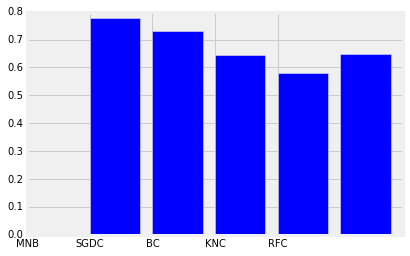

[<class 'sklearn.naive_bayes.MultinomialNB'>, <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, <class 'sklearn.ensemble.bagging.BaggingClassifier'>, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]


In [35]:
#Define our data
X_ = pos.append(neg).reset_index()

X = X_.iloc[:,1]

y_1 = np.ones((pos.size, 1))
y_2 = np.zeros((neg.size, 1))

y = np.vstack([y_1, y_2])

#Build our model
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

#Run the different classifier
for i in range(len(types)):
    nb = types[i]()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    results.append(metrics.accuracy_score(y_test, y_pred_class))


#Print results in bar graph
types_ = list(types)

%matplotlib inline

ind = np.arange(len(results))
width = 1

plt.bar(ind+width, results)
plt.xticks(range(len(types)), lbls)
plt.show()
print(types)

#Ignore the warnings

In [36]:
# Wow so multinomial NB performs the best

# I'll come back to this to show how to see which words best indicated positive or negative sentiment.
mdl = MultinomialNB()
mdl.fit(X_train_dtm, y_train)
preds = mdl.predict(X_test_dtm)
aucscore = sklearn.metrics.roc_auc_score(y_test, preds)
print(aucscore)

0.778278603822


/Users/nandanthor/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
